# LOAD AND CLEAN THE DATA

**Import the libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

**Conect with the csv through Google Drive**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv('/content/drive/MyDrive/From Finance to Programming/Proyectos/Stack Overflow - Data Analysis/survey_results_public_2021.csv',
                 index_col=0, thousands='.')

**Check the table and see how it's organize**

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

**Clean the data**

In [12]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(how='all')

**% of null values per column and drop these with more than 55% of null values**

In [ ]:
df.isnull().sum()/df.shape[0]

In [15]:
limit = len(df)*0.55
df.dropna(thresh=limit, axis=1, inplace=True)

**Drop these columns that are not relevant for this analysis**

In [16]:
to_drop = ['Age1stCode', 'OrgSize', 'MiscTechHaveWorkedWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 
           'NEWCollabToolsWantToWorkWith', 'NEWOtherComms', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 
           'MentalHealth', 'SurveyLength', 'SurveyEase']
df.drop(to_drop, inplace=True, axis=1)

**Improve data types.**

In [ ]:
df.dtypes

In [18]:
df['YearsCode'] =  df['YearsCode'].apply(pd.to_numeric, errors='coerce')
df['YearsCodePro'] =  df['YearsCodePro'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

**Drop outliers from dataset**

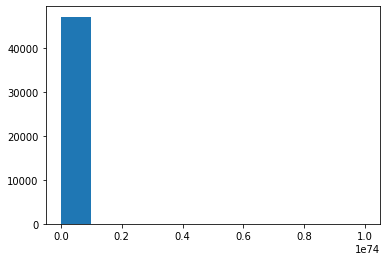

In [20]:
plt.hist(df['CompTotal'])
plt.show()

In [21]:
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

In [22]:
df = df[(df['CompTotal'] >= lower_limit) & (df['CompTotal'] <= upper_limit)]

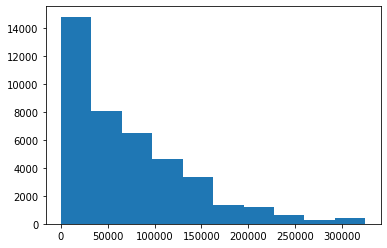

In [23]:
plt.hist(df['CompTotal'])
plt.show()

In [24]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

In [25]:
df = df[(df['ConvertedCompYearly'] >= lower_limit) & (df['ConvertedCompYearly'] <= upper_limit)]

**Improve some group names**

In [26]:
df.Country.unique()

array(['Slovakia', 'Sweden', 'Spain', 'Germany', 'Turkey', 'Canada',
       'Singapore', 'France', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Ukraine',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Pakistan', 'Nigeria', 'Albania',
       'Bangladesh', 'Austria', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Slovenia', 'Croatia', 'Georgia', 'Ireland',
       'Bahrain', 'Egypt', 'Colombia', 'Australia', 'Belgium', 'Portugal',
       'Denmark', 'Armenia', 'Finland', 'Argentina', 'Costa Rica',
       'Iran, Islamic Republic of...', 'Peru', 'United Arab Emirates',
       'Bolivia', 'South Africa', 'Serbia', 'Malta', 'Malaysia',
       'Czech Republic', 'Belarus', 'Kenya', 'Uruguay',
       'The former Yugoslav Republic of Macedonia', 'Botswana', 'Algeria',
       'Mexico', 'Cyprus', 'Hungary',
       'Venezuela, Bolivarian Republic of.

In [ ]:
df['Country'].replace(['United Kingdom of Great Britain and Northern Ireland', 'Russian Federation', 
                       'Hong Kong (S.A.R.)', 'Venezuela, Bolivarian Republic of...', 'Congo, Republic of the...',
                       'United States of America'], ['UK', 'Russia', 'Hong Kong', 'Venezuela', 'Congo', 'USA'],
                       inplace=True)

In [ ]:
df.EdLevel.unique()

In [ ]:
df['EdLevel'].replace(['Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)',
                       'Professional degree (JD, MD, etc.)',
                       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                       'Some college/university study without earning a degree'],
                       ['Associate degree', 'Bachelor’s degree', 'Master’s degree','Other doctoral degree',
                        'Professional degree', 'Secondary school', 'Studying a degree'], inplace=True)

In [ ]:
df['Currency'].replace(['EUR European Euro', 'GBP\tPound sterling', 'USD\tUnited States dollar',
                        'CAD\tCanadian dollar', 'SEK\tSwedish krona', 'TRY\tTurkish lira', 'CHF\tSwiss franc',
                        'RUB\tRussian ruble', 'INR\tIndian rupee', 'BRL\tBrazilian real', 'AUD\tAustralian dollar'],
                       ['EUR', 'GBP', 'USD', 'CAD', 'SEK', 'TRY', 'CHF', 'RUB', 'INR', 'BRL', 'AUD'], inplace=True)

In [ ]:
df['Age'].replace(['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old',
                   '65 years or older', 'Under 18 years old'], ['18-24', '25-34', '35-44', '45-54', '55-64', '>65',
                                                                '<18'], inplace=True)

# DATA ANALYSIS

**1. Which countries have the best salaries?**

In [32]:
df1 = df[['Country', 'ConvertedCompYearly']]

In [ ]:
df1.dropna(inplace=True)

In [34]:
filter1 = df1.groupby('Country').mean().sort_values('ConvertedCompYearly', ascending=False)

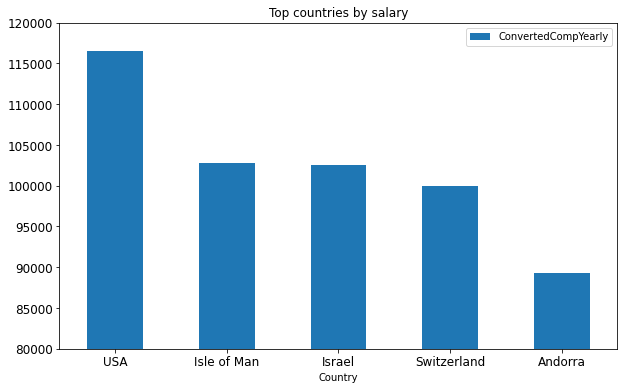

In [35]:
graph1 = filter1[:5].plot(kind='bar', title='Top countries by salary', ylim=[80000, 120000], figsize=(10,6),
                          fontsize=12, rot=0)

plt.show()

**2. Graph of the european salaries**

In [36]:
list_europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
               'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
               'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [37]:
filter2 = df1.groupby('Country').mean().sort_values('ConvertedCompYearly', ascending=False).reset_index()

In [38]:
filter2 = filter2.loc[filter2['Country'].isin(list_europe)]


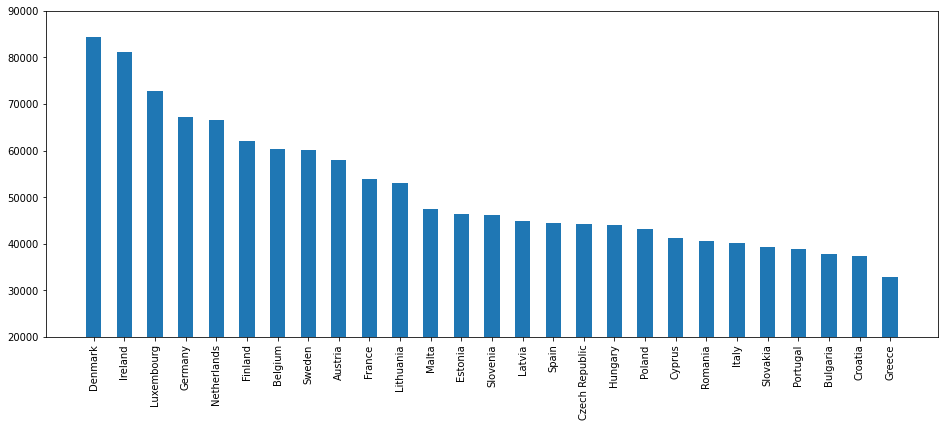

In [39]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.ylim([20000,90000])

plt.bar(filter2.Country, filter2.ConvertedCompYearly, width=0.5)
plt.show()

**3. Compare how Spain and USA use the differents op. systems**

In [40]:
df2 = df[['Country', 'OpSys']]

In [41]:
df2['OpSys'].unique()

array(['MacOS', 'Linux-based', 'Windows', 'Other (please specify):',
       'BSD', 'Windows Subsystem for Linux (WSL)', nan], dtype=object)

In [42]:
df2.shape

(38580, 2)

Drop null values in this new data frame:

In [ ]:
df2.dropna(inplace=True)

In [44]:
df2.shape

(38566, 2)

Group by operating system:

In [45]:
windows = df2[(df2['OpSys'] == 'Windows')]
mac = df2[(df2['OpSys'] == 'MacOS')]
other = df2[(df2['OpSys'] != 'Windows') & (df2['OpSys'] != 'MacOS')]

Count number of each:

In [46]:
win_spa = len(windows[(windows['Country'] == 'Spain')])
mac_spa = len(mac[(mac['Country'] == 'Spain')])
oth_spa = len(other[(other['Country'] == 'Spain')])
win_usa = len(windows[(windows['Country'] == 'USA')])
mac_usa = len(mac[(mac['Country'] == 'USA')])
oth_usa = len(other[(other['Country'] == 'USA')])

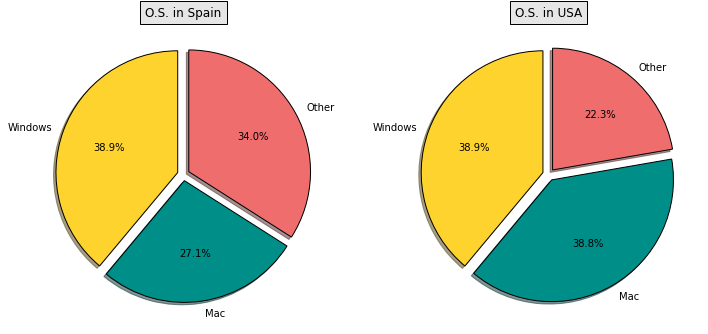

In [47]:
fig, axs = plt.subplots(1,2, figsize=(12,8))

labels = ['Windows', 'Mac', 'Other']
colors = ['#FFD32D', '#008E89', '#EF6D6D']
explode = (0.05, 0.05, 0.05)

axs[0].pie([win_spa, mac_spa, oth_spa], labels = labels, colors = colors, autopct='%.1f%%',
        explode = explode, startangle = 90, wedgeprops = {'edgecolor': 'black'}, shadow=True,)
axs[0].set_title('O.S. in Spain', bbox={'facecolor':'0.9' , 'pad': 5})

axs[1].pie([win_usa, mac_usa, oth_usa], labels = labels, colors = colors, autopct='%.1f%%',
        explode = explode, startangle = 90, wedgeprops = {'edgecolor': 'black'}, shadow=True,)
axs[1].set_title('O.S. in USA', bbox={'facecolor':'0.9' , 'pad': 5})


plt.show()

**4. Age distribution**

In [48]:
df.Age.value_counts()

25-34                18891
35-44                 9222
18-24                 6118
45-54                 3038
55-64                  958
>65                    129
<18                     86
Prefer not to say       52
Name: Age, dtype: int64

In [49]:
list_ages = df.Age.value_counts().values

In [50]:
list_ages = np.delete(list_ages, slice(5,8), axis=0)

In [51]:
print(list_ages)

[18891  9222  6118  3038   958]


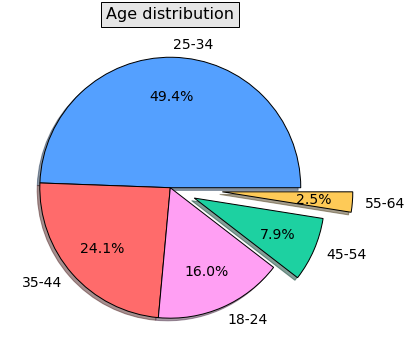

In [52]:
plt.figure(figsize=(10,6))
colors = ['#54a0ff','#ff6b6b','#ff9ff3','#1dd1a1','#feca57']
explode = (0, 0, 0, 0.2, 0.4)

labels = ['25-34 ', '35-44', '18-24', '45-54', '55-64']

plt.title('Age distribution', fontsize=16, bbox={'facecolor':'0.9' , 'pad': 5})

plt.pie(list_ages, labels=labels, colors=colors, explode=explode, autopct='%.1f%%',
        textprops={'fontsize': 14}, wedgeprops = {'edgecolor': 'black'}, shadow=True,
        pctdistance=0.7)

plt.show()

**5. Relationship between background and salary**

In [53]:
df.EdLevel.value_counts()

Bachelor’s degree            17907
Master’s degree               9891
Studying a degree             4960
Secondary school              1834
Other doctoral degree         1452
Associate degree              1229
Professional degree            649
Something else                 432
Primary/elementary school      212
Name: EdLevel, dtype: int64

In [54]:
df3 = df[['EdLevel', 'ConvertedCompYearly']]
df3 = df3.dropna()


In [55]:
df3 = df3.groupby('EdLevel')['ConvertedCompYearly'].mean().sort_values()
df3

EdLevel
Professional degree          48225.098613
Something else               51326.523148
Secondary school             51603.177754
Primary/elementary school    58549.839623
Studying a degree            61575.315927
Associate degree             66009.198535
Bachelor’s degree            66166.277378
Master’s degree              68860.363563
Other doctoral degree        82597.476584
Name: ConvertedCompYearly, dtype: float64

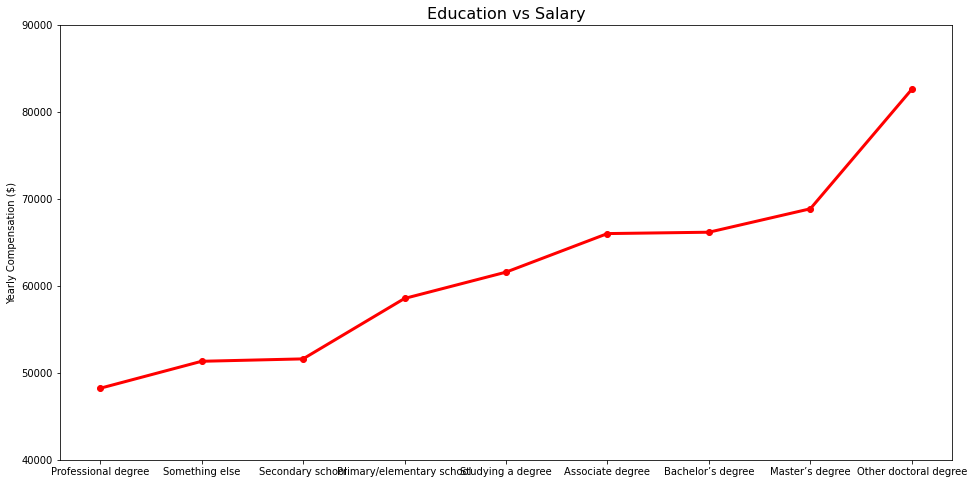

In [57]:
plt.figure(figsize=(16,8))
plt.ylim([40000,90000])
plt.title('Education vs Salary', fontsize=16)
plt.ylabel('Yearly Compensation ($)')

plt.plot(df3, linewidth=3, color='r', marker='o')

plt.show()